# PO1 Aggregate 3 Label 126

In [1]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic

## 1) Load aggregate

In [2]:
load_stl.load_aggregate('C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\PO1_Agg3_Label_126.stl')

Number of points: 266526
Number of elements:
  triangle: 537806

In [3]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('PO1_Agg3_Label_126.vtk')
reader.Update()

aggregate_coord = np.array(reader.GetOutput().GetPoints().GetData())
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

[[0.010494 0.023306 0.014202]
 [0.010479 0.02331  0.014202]
 [0.010494 0.02331  0.0142  ]
 ...
 [0.012204 0.019908 0.018722]
 [0.012222 0.019908 0.018722]
 [0.01224  0.019908 0.018721]]


In [4]:
print(aggregate_coord.shape)

(266526, 3)


## 2) Bounding box

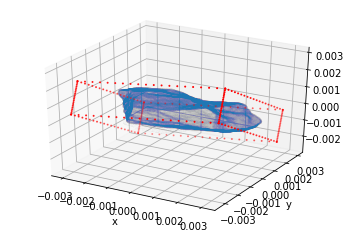

In [4]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [6]:
print(bbox_aggregate)

{'angles': array([-0.59878771,  0.16217717]), 'volume': 6.088701144752693e-08}


## 3) Bounding ellipsoid

In [5]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-14)

In [12]:
print(bounding_ellipsoid)

{'volume': 9.798926376858107e-08, 'a': 0.004334784330058466, 'b': 0.004212880393070603, 'c': 0.001280982690349508, 'bbox': {'angles': array([-0.59878771,  0.16217717]), 'volume': 6.088701144752693e-08}}


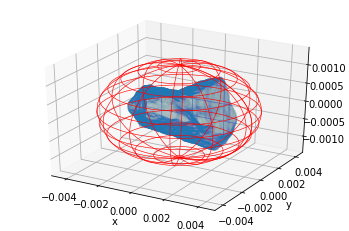

In [13]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 0.0001)

## 4) Included ellipsoid

In [6]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-13)

In [16]:
print(included_ellipsoid)

{'volume': 3.791701025773291e-09, 'a': 0.0014661757265712286, 'b': 0.0014249435498869829, 'c': 0.00043327316510877656, 'bbox': {'angles': array([-0.59878771,  0.16217717]), 'volume': 6.088701144752693e-08}}


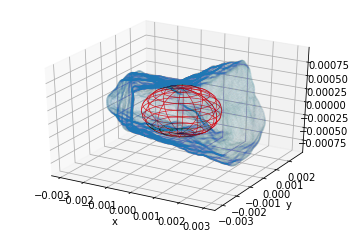

In [17]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 0.0001)

## 5) Middle ellipsoid

In [7]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [19]:
print(middle_ellipsoid)

{'volume': 2.9355240895152033e-08, 'a': 0.0029004800283148474, 'b': 0.002818911971478793, 'c': 0.0008571279277291423}


## 6) Roughness Map

In [15]:
reload(ic)
reload(bf)
reload(plot)

<module 'indicators_calculation' from 'C:\\Users\\dschmidt\\Documents\\Cuttings\\indicators_calculation.py'>

In [8]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [9]:
tomo_surface = 5.7097284e-005
tomo_volume = 1.981644e-008

Aggregate standard sphericity =  0.6202295189402515
Bounding box and ellispoids ratios :
a/b = 1.0289360071053457
a/c = 3.383952306861967
b/c = 3.2887879163465867
a^2/bc = 3.4818703748574764
Bounding ellipsoid surface / Included ellipsoid surface = 8.741036607498623
Aggregate tomographed surface / Bounding ellipsoid surface = 0.4229166940981581
Aggregate tomographed surface / Middle ellipsoid surface = 0.9446046070241122
Aggregate tomographed surface / Included ellipsoid surface = 3.6967303050342966
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0007535059674734408
 
data min max
theta 0.00038605511464203757 6.283171570131993
phi 0.0035801267335383723 3.1381839629512007
alpha 0.0003972260070238054 6.283171172636686
beta 0.0010579827660552512 3.1405853332058133
distance -0.002125298966571619 0.002184877456088136


C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:227: RuntimeWarning: invalid value encountered in less
  zi[(zi<zmin) | (zi>zmax)] = None
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:227: RuntimeWarning: invalid value encountered in greater
  zi[(zi<zmin) | (zi>zmax)] = None
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:228: RuntimeWarning: invalid value encountered in less
  zi_filtered[(zi_filtered<zmin) | (zi_filtered>zmax)] = None
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:228: RuntimeWarning: invalid value encountered in greater
  zi_filtered[(zi_filtered<zmin) | (zi_filtered>zmax)] = None


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

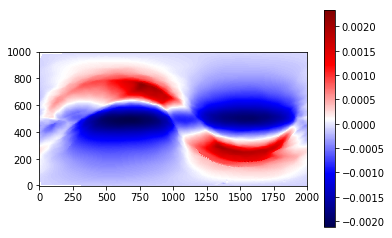

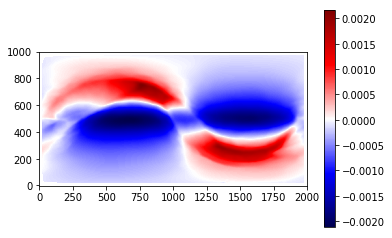

C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:242: RuntimeWarning: invalid value encountered in less
  rugosity[(rugosity<rugosity_min) | (rugosity>rugosity_max)] = None
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:242: RuntimeWarning: invalid value encountered in greater
  rugosity[(rugosity<rugosity_min) | (rugosity>rugosity_max)] = None


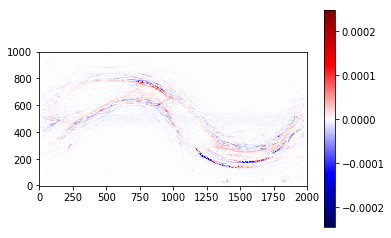

{'aggregate_standard_sphericity': 0.6202295189402515,
 'a/b': 1.0289360071053457,
 'a/c': 3.383952306861967,
 'b/c': 3.2887879163465867,
 'a^2/bc': 3.4818703748574764,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 8.741036607498623,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.4229166940981581,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 0.9446046070241122,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 3.6967303050342966,
 'roughness_distance': array([[2.43615364e+00, 2.38639093e+00, 2.13853976e-03, 2.42204284e+00,
         2.86710506e+00],
        [2.43911406e+00, 2.38327907e+00, 2.14534950e-03, 2.42501580e+00,
         2.86549620e+00],
        [2.43479721e+00, 2.38623244e+00, 2.14163570e-03, 2.42068083e+00,
         2.86701218e+00],
        ...,
        [4.71379363e+00, 7.37961430e-01, 1.77293102e-03, 4.71375413e+00,
         2.69762579e-01],
        [4.72305230e+00, 7.37989239e-01, 1.77298004e-03, 4.72275244e+00,
         

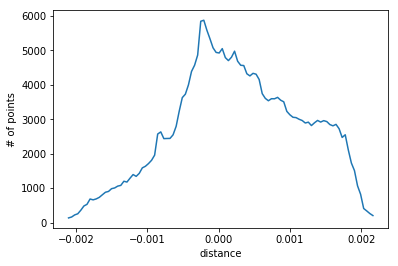

In [10]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.0025, sigma=5)

Aggregate standard sphericity =  0.6202295189402515
Bounding box and ellispoids ratios :
a/b = 1.0289360071053457
a/c = 3.383952306861967
b/c = 3.2887879163465867
a^2/bc = 3.4818703748574764
Bounding ellipsoid surface / Included ellipsoid surface = 8.741036607498623
Aggregate tomographed surface / Bounding ellipsoid surface = 0.4229166940981581
Aggregate tomographed surface / Middle ellipsoid surface = 0.9446046070241122
Aggregate tomographed surface / Included ellipsoid surface = 3.6967303050342966
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0007535059674734408
 
data min max
theta 0.00038605511464203757 6.283171570131993
phi 0.0035801267335383723 3.1381839629512007
alpha 0.0003972260070238054 6.283171172636686
beta 0.0010579827660552512 3.1405853332058133
distance -0.002125298966571619 0.002184877456088136


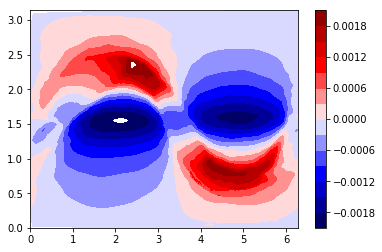

{'aggregate_standard_sphericity': 0.6202295189402515,
 'a/b': 1.0289360071053457,
 'a/c': 3.383952306861967,
 'b/c': 3.2887879163465867,
 'a^2/bc': 3.4818703748574764,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 8.741036607498623,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.4229166940981581,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 0.9446046070241122,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 3.6967303050342966,
 'roughness_distance': array([[2.43615364e+00, 2.38639093e+00, 2.13853976e-03, 2.42204284e+00,
         2.86710506e+00],
        [2.43911406e+00, 2.38327907e+00, 2.14534950e-03, 2.42501580e+00,
         2.86549620e+00],
        [2.43479721e+00, 2.38623244e+00, 2.14163570e-03, 2.42068083e+00,
         2.86701218e+00],
        ...,
        [4.71379363e+00, 7.37961430e-01, 1.77293102e-03, 4.71375413e+00,
         2.69762579e-01],
        [4.72305230e+00, 7.37989239e-01, 1.77298004e-03, 4.72275244e+00,
         

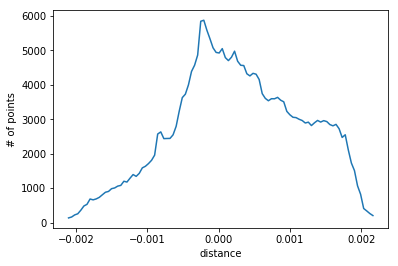

In [25]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.0021)

Aggregate standard sphericity =  0.6202295189402515
Bounding box and ellispoids ratios :
a/b = 1.0289360071053457
a/c = 3.383952306861967
b/c = 3.2887879163465867
a^2/bc = 3.4818703748574764
Bounding ellipsoid surface / Included ellipsoid surface = 8.741036607498623
Aggregate tomographed surface / Bounding ellipsoid surface = 0.4229166940981581
Aggregate tomographed surface / Middle ellipsoid surface = 0.9446046070241122
Aggregate tomographed surface / Included ellipsoid surface = 3.6967303050342966
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0007535059674734408
 
data min max
theta 0.00038605511464203757 6.283171570131993
phi 0.0035801267335383723 3.1381839629512007
alpha 0.0003972260070238054 6.283171172636686
beta 0.0010579827660552512 3.1405853332058133
distance -0.002125298966571619 0.002184877456088136


C:\Users\dschmidt\Documents\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in less
  zi[(zi<zmin) | (zi>zmax)] = None
C:\Users\dschmidt\Documents\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in greater
  zi[(zi<zmin) | (zi>zmax)] = None


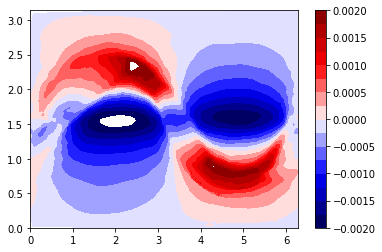

{'aggregate_standard_sphericity': 0.6202295189402515,
 'a/b': 1.0289360071053457,
 'a/c': 3.383952306861967,
 'b/c': 3.2887879163465867,
 'a^2/bc': 3.4818703748574764,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 8.741036607498623,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.4229166940981581,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 0.9446046070241122,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 3.6967303050342966,
 'roughness_distance': array([[2.43615364e+00, 2.38639093e+00, 2.13853976e-03, 2.42204284e+00,
         2.86710506e+00],
        [2.43911406e+00, 2.38327907e+00, 2.14534950e-03, 2.42501580e+00,
         2.86549620e+00],
        [2.43479721e+00, 2.38623244e+00, 2.14163570e-03, 2.42068083e+00,
         2.86701218e+00],
        ...,
        [4.71379363e+00, 7.37961430e-01, 1.77293102e-03, 4.71375413e+00,
         2.69762579e-01],
        [4.72305230e+00, 7.37989239e-01, 1.77298004e-03, 4.72275244e+00,
         

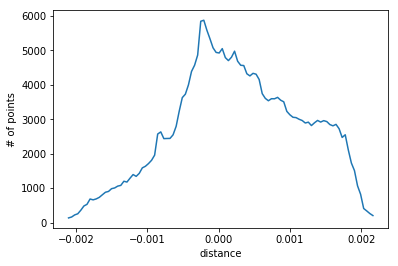

In [24]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.002)